In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


601

In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [14]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind = []
id_number = []
city_name = []
max_temp = []
country = []
date = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city,time.sleep(1)).json()
        print(city, response)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        id_number.append(response['id'])
        city_name.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except: 
        continue


hasaki {'coord': {'lon': 140.8333, 'lat': 35.7333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 31.69, 'feels_like': 22.57, 'temp_min': 24.8, 'temp_max': 35.6, 'pressure': 1019, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 300}, 'clouds': {'all': 20}, 'dt': 1612475398, 'sys': {'type': 1, 'id': 7955, 'country': 'JP', 'sunrise': 1612474432, 'sunset': 1612512446}, 'timezone': 32400, 'id': 2112802, 'name': 'Hasaki', 'cod': 200}
havoysund {'coord': {'lon': 24.6622, 'lat': 70.9963}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 16.83, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 1026, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 10}, 'snow': {'1h': 0.13}, 'clouds': {'all': 75}, 'dt': 1612475399, 'sys': {'type': 1, 'id': 1638, 'country': 'NO', 'sunrise': 1612425981, 

flin flon {'coord': {'lon': -101.865, 'lat': 54.7682}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -2.2, 'feels_like': -15.3, 'temp_min': -2.2, 'temp_max': -2.2, 'pressure': 1011, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1612475417, 'sys': {'type': 1, 'id': 782, 'country': 'CA', 'sunrise': 1612449073, 'sunset': 1612481496}, 'timezone': -21600, 'id': 5954718, 'name': 'Flin Flon', 'cod': 200}
port alfred {'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 66.99, 'feels_like': 69.62, 'temp_min': 66.99, 'temp_max': 66.99, 'pressure': 1017, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 58, 'gust': 5.99}, 'clouds': {'all': 18}, 'dt': 1612475418, 'sys': {'type': 3, 'id': 2011314, 'country': 'ZA', 'sunrise': 1612409860, 'suns

saint-philippe {'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.87, 'feels_like': 80.08, 'temp_min': 73, 'temp_max': 78.8, 'pressure': 1013, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 30}, 'rain': {'1h': 0.16}, 'clouds': {'all': 50}, 'dt': 1612475434, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1612490496, 'sunset': 1612537216}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
nguiu {'cod': '404', 'message': 'city not found'}
maiquetia {'coord': {'lon': -66.9548, 'lat': 10.5962}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 89.82, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1014, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 8.39, 'deg': 79}, 'clouds': {'all': 40}, 'dt': 1612475436, 'sy

busselton {'coord': {'lon': 115.3333, 'lat': -33.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 48.99, 'feels_like': 40.51, 'temp_min': 48.99, 'temp_max': 48.99, 'pressure': 1017, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 12.84, 'deg': 131}, 'clouds': {'all': 20}, 'dt': 1612475453, 'sys': {'type': 3, 'id': 2008303, 'country': 'AU', 'sunrise': 1612475072, 'sunset': 1612524047}, 'timezone': 28800, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
bathurst {'coord': {'lon': 149.5806, 'lat': -33.4166}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.01, 'feels_like': 72.57, 'temp_min': 69.01, 'temp_max': 69.01, 'pressure': 1012, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 243, 'gust': 1.01}, 'clouds': {'all': 71}, 'dt': 1612475455, 'sys': {'type': 3, 'id': 2036077, 'country': 'AU', 'sunrise

beira {'coord': {'lon': 34.8389, 'lat': -19.8436}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.2, 'feels_like': 92.19, 'temp_min': 82, 'temp_max': 82.4, 'pressure': 1012, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1612475297, 'sys': {'type': 1, 'id': 2194, 'country': 'MZ', 'sunrise': 1612409208, 'sunset': 1612455739}, 'timezone': 7200, 'id': 1052373, 'name': 'Beira', 'cod': 200}
laguna {'coord': {'lon': -121.4238, 'lat': 38.421}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 56.62, 'feels_like': 47.68, 'temp_min': 53.6, 'temp_max': 57.99, 'pressure': 1024, 'humidity': 44}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 340}, 'clouds': {'all': 1}, 'dt': 1612475473, 'sys': {'type': 1, 'id': 5769, 'country': 'US', 'sunrise': 1612451276, 'sunset': 1612488683}, 'timez

bargal {'cod': '404', 'message': 'city not found'}
rio cuarto {'coord': {'lon': -64.3499, 'lat': -33.1307}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77.52, 'feels_like': 72.66, 'temp_min': 75.99, 'temp_max': 78.8, 'pressure': 1019, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1612475492, 'sys': {'type': 1, 'id': 8252, 'country': 'AR', 'sunrise': 1612431821, 'sunset': 1612480740}, 'timezone': -10800, 'id': 3838874, 'name': 'Río Cuarto', 'cod': 200}
ketchikan {'coord': {'lon': -131.6461, 'lat': 55.3422}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 38.82, 'feels_like': 33.78, 'temp_min': 37.4, 'temp_max': 41, 'pressure': 1017, 'humidity': 100}, 'visibility': 8047, 'wind': {'speed': 4.61, 'deg': 150}, 'rain

bukama {'coord': {'lon': 25.85, 'lat': -9.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.38, 'feels_like': 75.94, 'temp_min': 70.38, 'temp_max': 70.38, 'pressure': 1013, 'humidity': 88, 'sea_level': 1013, 'grnd_level': 946}, 'visibility': 10000, 'wind': {'speed': 0.83, 'deg': 188}, 'clouds': {'all': 92}, 'dt': 1612475510, 'sys': {'country': 'CD', 'sunrise': 1612412174, 'sunset': 1612457088}, 'timezone': 7200, 'id': 217834, 'name': 'Bukama', 'cod': 200}
kuusamo {'coord': {'lon': 29.1833, 'lat': 65.9667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 5, 'feels_like': -4.47, 'temp_min': 5, 'temp_max': 5, 'pressure': 1016, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1612475500, 'sys': {'type': 1, 'id': 1352, 'country': 'FI', 'sunrise': 1612421319, 'sunset': 1612446343

carnarvon {'coord': {'lon': 113.6333, 'lat': -24.8667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.39, 'feels_like': 76.96, 'temp_min': 78.39, 'temp_max': 78.39, 'pressure': 996, 'humidity': 85, 'sea_level': 996, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 19.37, 'deg': 35}, 'clouds': {'all': 99}, 'dt': 1612475527, 'sys': {'country': 'AU', 'sunrise': 1612476309, 'sunset': 1612523626}, 'timezone': 28800, 'id': 2074865, 'name': 'Carnarvon', 'cod': 200}
taolanaro {'cod': '404', 'message': 'city not found'}
saint-gaudens {'coord': {'lon': 0.6667, 'lat': 43.0833}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 48.79, 'feels_like': 46.47, 'temp_min': 44.6, 'temp_max': 52, 'pressure': 1009, 'humidity': 100}, 'visibility': 1300, 'wind': {'speed': 3.69, 'deg': 188}, 'clouds': {'all': 20}, 'dt': 1612475529, 'sys': {'type': 1,

cedar city {'coord': {'lon': -113.0619, 'lat': 37.6775}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 24.13, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 1022, 'humidity': 38}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 20}, 'clouds': {'all': 20}, 'dt': 1612475546, 'sys': {'type': 1, 'id': 3584, 'country': 'US', 'sunrise': 1612449188, 'sunset': 1612486756}, 'timezone': -25200, 'id': 5536630, 'name': 'Cedar City', 'cod': 200}
georgetown {'coord': {'lon': 100.3354, 'lat': 5.4112}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.35, 'feels_like': 82.18, 'temp_min': 73.4, 'temp_max': 78.01, 'pressure': 1010, 'humidity': 78}, 'visibility': 9000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1612475547, 'sys': {'type': 1, 'id': 9429, 'country': 'MY', 'sunrise': 1612481723, 'sunset': 161

ilulissat {'coord': {'lon': -51.1, 'lat': 69.2167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -0.4, 'feels_like': -14.42, 'temp_min': -0.4, 'temp_max': -0.4, 'pressure': 1028, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1612475263, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 1612442531, 'sunset': 1612463669}, 'timezone': -10800, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
urdzhar {'cod': '404', 'message': 'city not found'}
wadi musa {'coord': {'lon': 35.4793, 'lat': 30.3222}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 45.88, 'feels_like': 36.5, 'temp_min': 45.88, 'temp_max': 45.88, 'pressure': 1011, 'humidity': 92, 'sea_level': 1011, 'grnd_level': 884}, 'visibility': 1843, 'wind': {'speed': 14.05, 'deg': 246}, 'clouds': {'all': 35}, 'dt': 16124

hoquiam {'coord': {'lon': -123.8893, 'lat': 46.9809}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 47.03, 'feels_like': 37.27, 'temp_min': 46.4, 'temp_max': 48, 'pressure': 1029, 'humidity': 100}, 'visibility': 2414, 'wind': {'speed': 16.11, 'deg': 220}, 'rain': {'1h': 0.18}, 'clouds': {'all': 90}, 'dt': 1612475582, 'sys': {'type': 1, 'id': 4406, 'country': 'US', 'sunrise': 1612452964, 'sunset': 1612488177}, 'timezone': -28800, 'id': 5797693, 'name': 'Hoquiam', 'cod': 200}
chuy {'coord': {'lon': -53.4616, 'lat': -33.6971}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.22, 'feels_like': 60.82, 'temp_min': 66.22, 'temp_max': 66.22, 'pressure': 1010, 'humidity': 75, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 14.14, 'deg': 215},

uvat {'coord': {'lon': 68.8953, 'lat': 59.1433}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.99, 'feels_like': 1.8, 'temp_min': 10.99, 'temp_max': 10.99, 'pressure': 1014, 'humidity': 94, 'sea_level': 1014, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 6.04, 'deg': 147}, 'clouds': {'all': 100}, 'dt': 1612475599, 'sys': {'country': 'RU', 'sunrise': 1612495492, 'sunset': 1612525919}, 'timezone': 18000, 'id': 1487939, 'name': 'Uvat', 'cod': 200}
isangel {'coord': {'lon': 169.2667, 'lat': -19.55}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 85.98, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1006, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1612475600, 'sys': {'type': 1, 'id': 7317, 'country': 'VU', 'sunrise': 1612463391, 

plattsburgh {'coord': {'lon': -73.4529, 'lat': 44.6995}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 30.74, 'feels_like': 21.85, 'temp_min': 30.2, 'temp_max': 30.99, 'pressure': 1010, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 120}, 'clouds': {'all': 1}, 'dt': 1612475618, 'sys': {'type': 1, 'id': 5311, 'country': 'US', 'sunrise': 1612440545, 'sunset': 1612476386}, 'timezone': -18000, 'id': 5131692, 'name': 'Plattsburgh', 'cod': 200}
cidreira {'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 71.31, 'feels_like': 63.79, 'temp_min': 71.31, 'temp_max': 71.31, 'pressure': 1007, 'humidity': 70, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 19.86, 'deg': 226}, 'clouds': {'all': 16}, 'dt': 1612475620, 'sys': {'country': 'BR', 'sunrise': 16

hunza {'cod': '404', 'message': 'city not found'}
port-gentil {'coord': {'lon': 8.7815, 'lat': -0.7193}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 91.89, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1011, 'humidity': 89}, 'visibility': 8000, 'wind': {'speed': 5.75, 'deg': 200}, 'rain': {'1h': 0.83}, 'clouds': {'all': 90}, 'dt': 1612475640, 'sys': {'type': 1, 'id': 2188, 'country': 'GA', 'sunrise': 1612416870, 'sunset': 1612460585}, 'timezone': 3600, 'id': 2396518, 'name': 'Port-Gentil', 'cod': 200}
geraldton {'coord': {'lon': 114.6, 'lat': -28.7667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 59.58, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1004, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 25.32, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1612475641, 'sys': {'t

pevek {'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -11.52, 'feels_like': -25.1, 'temp_min': -11.52, 'temp_max': -11.52, 'pressure': 1029, 'humidity': 77, 'sea_level': 1029, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 12.01, 'deg': 86}, 'clouds': {'all': 0}, 'dt': 1612475484, 'sys': {'country': 'RU', 'sunrise': 1612476053, 'sunset': 1612496673}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
livingston {'coord': {'lon': -3.5226, 'lat': 55.9029}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 39.07, 'feels_like': 29.21, 'temp_min': 37, 'temp_max': 41, 'pressure': 1007, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 90}, 'rain': {'1h': 0.56}, 'clouds': {'all': 90}, 'dt': 1612475659, 'sys': {'type': 1, 'id': 1442, 'country': 'GB', 'sunrise'

norman wells {'coord': {'lon': -126.8329, 'lat': 65.282}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -41.8, 'feels_like': -50.87, 'temp_min': -41.8, 'temp_max': -41.8, 'pressure': 1033, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1612475676, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1612458340, 'sunset': 1612484215}, 'timezone': -25200, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
bahia de caraquez {'coord': {'lon': -80.4167, 'lat': -0.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 89.01, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1007, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1612475677, 'sys': {'type': 1, 'id': 8552, 'country': 'EC', 'sunrise': 161243828

iquique {'coord': {'lon': -70.1431, 'lat': -20.2208}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 69.71, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1011, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1612476559, 'sys': {'type': 1, 'id': 8492, 'country': 'CL', 'sunrise': 1612434383, 'sunset': 1612480958}, 'timezone': -10800, 'id': 3887127, 'name': 'Iquique', 'cod': 200}
kununurra {'coord': {'lon': 128.7333, 'lat': -15.7667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 90.86, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1003, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 1.14, 'deg': 90}, 'clouds': {'all': 100}, 'dt': 1612476560, 'sys': {'type': 1, 'id': 9587, 'country': 'AU', 'sunrise': 1612473415, 'sunset': 1

manerbio {'coord': {'lon': 10.1352, 'lat': 45.3558}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 45.07, 'feels_like': 41.83, 'temp_min': 42.8, 'temp_max': 46.4, 'pressure': 1018, 'humidity': 87}, 'visibility': 2500, 'wind': {'speed': 2.3, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1612476576, 'sys': {'type': 1, 'id': 6767, 'country': 'IT', 'sunrise': 1612420592, 'sunset': 1612456213}, 'timezone': 3600, 'id': 3174093, 'name': 'Manerbio', 'cod': 200}
charlestown {'coord': {'lon': 151.6667, 'lat': -32.95}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 76.55, 'feels_like': 82.83, 'temp_min': 75, 'temp_max': 78.01, 'pressure': 1011, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 26, 'gust': 8.99}, 'clouds': {'all': 17}, 'dt': 1612476284, 'sys': {'type': 3, 'id': 2007334, 'country': 'AU', 'sunrise': 1612466419, 'sunset': 1

khatanga {'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -30.87, 'feels_like': -43.08, 'temp_min': -30.87, 'temp_max': -30.87, 'pressure': 1017, 'humidity': 78, 'sea_level': 1017, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.15, 'deg': 89}, 'clouds': {'all': 0}, 'dt': 1612476595, 'sys': {'country': 'RU', 'sunrise': 1612494476, 'sunset': 1612510803}, 'timezone': 25200, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
gushikawa {'coord': {'lon': 127.8686, 'lat': 26.3544}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 52.84, 'feels_like': 49.93, 'temp_min': 44.6, 'temp_max': 59, 'pressure': 1022, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 50}, 'clouds': {'all': 1}, 'dt': 1612476596, 'sys': {'type': 1, 'id': 8138, 'country': 'JP', 'sunrise': 1612476673, 'suns

kahului {'coord': {'lon': -156.47, 'lat': 20.8947}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 67.91, 'feels_like': 61.21, 'temp_min': 63, 'temp_max': 71.6, 'pressure': 1012, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 340, 'gust': 19.57}, 'clouds': {'all': 75}, 'dt': 1612476617, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1612458079, 'sunset': 1612498703}, 'timezone': -36000, 'id': 5847411, 'name': 'Kahului', 'cod': 200}
aljezur {'coord': {'lon': -8.8033, 'lat': 37.3191}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 53.01, 'feels_like': 52.25, 'temp_min': 53.01, 'temp_max': 53.01, 'pressure': 1009, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 233, 'gust': 4}, 'rain': {'1h': 0.21}, 'clouds': {'all': 100}, 'dt': 1612476618, 'sys': {'type': 3, 'id': 73730, 'country':

la asuncion {'coord': {'lon': -63.8628, 'lat': 11.0333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.53, 'feels_like': 76.44, 'temp_min': 78.53, 'temp_max': 78.53, 'pressure': 1012, 'humidity': 79, 'sea_level': 1012, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 18.59, 'deg': 75}, 'clouds': {'all': 24}, 'dt': 1612476633, 'sys': {'country': 'VE', 'sunrise': 1612435127, 'sunset': 1612477200}, 'timezone': -14400, 'id': 3480908, 'name': 'La Asuncion', 'cod': 200}
mayo {'coord': {'lon': -76.5119, 'lat': 38.8876}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 43.2, 'feels_like': 36, 'temp_min': 42.01, 'temp_max': 44.6, 'pressure': 1014, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 3.31, 'deg': 259}, 'clouds': {'all': 1}, 'dt': 1612476362, 'sys': {'type': 1, 'id': 5056, 'country': 'US', 'sunrise': 1612440556, 

taywarah {'coord': {'lon': 64.4167, 'lat': 33.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.8, 'feels_like': 19.04, 'temp_min': 24.8, 'temp_max': 24.8, 'pressure': 1024, 'humidity': 79, 'sea_level': 1024, 'grnd_level': 735}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 357}, 'clouds': {'all': 0}, 'dt': 1612476652, 'sys': {'country': 'AF', 'sunrise': 1612492524, 'sunset': 1612531037}, 'timezone': 16200, 'id': 1122464, 'name': 'Taywarah', 'cod': 200}
coihaique {'coord': {'lon': -72.0662, 'lat': -45.5752}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 82.09, 'temp_min': 86, 'temp_max': 86, 'pressure': 1014, 'humidity': 26}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1612476653, 'sys': {'type': 1, 'id': 8491, 'country': 'CL', 'sunrise': 1612432111, 'sunset': 16124

bur gabo {'cod': '404', 'message': 'city not found'}
teya {'coord': {'lon': 92.6267, 'lat': 60.3778}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.07, 'feels_like': -8.7, 'temp_min': 0.07, 'temp_max': 0.07, 'pressure': 1014, 'humidity': 90, 'sea_level': 1014, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 4.21, 'deg': 216}, 'clouds': {'all': 99}, 'dt': 1612476663, 'sys': {'country': 'RU', 'sunrise': 1612490164, 'sunset': 1612519854}, 'timezone': 25200, 'id': 1489656, 'name': 'Teya', 'cod': 200}
chatellerault {'coord': {'lon': 0.5333, 'lat': 46.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 51.37, 'feels_like': 46.94, 'temp_min': 51.01, 'temp_max': 51.8, 'pressure': 1011, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 200}, 'rain': {'1h': 0.12}, 'clouds': {'all': 75}, 'dt': 1612476672, 'sy

huarmey {'coord': {'lon': -78.1522, 'lat': -10.0681}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.39, 'feels_like': 73.96, 'temp_min': 74.39, 'temp_max': 74.39, 'pressure': 1013, 'humidity': 66, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.14, 'deg': 204}, 'clouds': {'all': 99}, 'dt': 1612476521, 'sys': {'country': 'PE', 'sunrise': 1612437077, 'sunset': 1612482109}, 'timezone': -18000, 'id': 3939168, 'name': 'Huarmey', 'cod': 200}
tambun {'coord': {'lon': 107.0712, 'lat': -6.2641}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 77.02, 'feels_like': 85.51, 'temp_min': 75.99, 'temp_max': 78.01, 'pressure': 1009, 'humidity': 94}, 'visibility': 4000, 'wind': {'speed': 3.44, 'deg': 240}, 'rain': {'1h': 0.32}, 'clouds': {'all': 

ixtapa {'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 72.05, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1011, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 210}, 'clouds': {'all': 1}, 'dt': 1612476708, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise': 1612445762, 'sunset': 1612486408}, 'timezone': -21600, 'id': 4004293, 'name': 'Ixtapa', 'cod': 200}
yulara {'coord': {'lon': 130.9889, 'lat': -25.2406}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 62.02, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1007, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1612476709, 'sys': {'type': 1, 'id': 9487, 'country': 'AU', 'sunrise': 1612472110, 'sunset': 1612519494}, '

komsomolskiy {'coord': {'lon': 71.7189, 'lat': 40.4272}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 24.1, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 1022, 'humidity': 69}, 'visibility': 5000, 'wind': {'speed': 9.22, 'deg': 150}, 'clouds': {'all': 1}, 'dt': 1612476727, 'sys': {'type': 1, 'id': 9014, 'country': 'UZ', 'sunrise': 1612491523, 'sunset': 1612528533}, 'timezone': 18000, 'id': 1513491, 'name': 'Yangi Marg`ilon', 'cod': 200}
vila {'coord': {'lon': -8.1588, 'lat': 42.0304}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 44.01, 'feels_like': 40.57, 'temp_min': 44.01, 'temp_max': 44.01, 'pressure': 1011, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 2.8, 'deg': 75}, 'clouds': {'all': 100}, 'dt': 1612476520, 'sys': {'type': 3, 'id': 2007751, 'country': 'PT', 'sunrise': 1612424537, 'sunset': 161

vila franca do campo {'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 55.18, 'feels_like': 47.1, 'temp_min': 55, 'temp_max': 55.4, 'pressure': 1024, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 10, 'gust': 25.32}, 'clouds': {'all': 40}, 'dt': 1612476745, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1612428175, 'sunset': 1612465705}, 'timezone': -3600, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
alta floresta {'coord': {'lon': -56.0861, 'lat': -9.8756}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 79.09, 'feels_like': 87.44, 'temp_min': 79.09, 'temp_max': 79.09, 'pressure': 1007, 'humidity': 84, 'sea_level': 1007, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 132}, 'rain': {'1h': 0.434}, 'clouds': {'all': 9

taft {'coord': {'lon': 54.2088, 'lat': 31.7471}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 39.61, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 1023, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1612480478, 'sys': {'type': 1, 'id': 7511, 'country': 'IR', 'sunrise': 1612494820, 'sunset': 1612533640}, 'timezone': 12600, 'id': 113632, 'name': 'Taft', 'cod': 200}
buy {'coord': {'lon': 41.53, 'lat': 58.4786}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.57, 'feels_like': -1.32, 'temp_min': 6.57, 'temp_max': 6.57, 'pressure': 1003, 'humidity': 94, 'sea_level': 1003, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 3.24, 'deg': 271}, 'clouds': {'all': 99}, 'dt': 1612480479, 'sys': {'country': 'RU', 'sunrise': 1612501869, 'sunset': 161253267

balkhash {'coord': {'lon': 74.9804, 'lat': 46.844}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.25, 'feels_like': 17.67, 'temp_min': 23.25, 'temp_max': 23.25, 'pressure': 1026, 'humidity': 98, 'sea_level': 1026, 'grnd_level': 979}, 'visibility': 10000, 'wind': {'speed': 1.52, 'deg': 16}, 'clouds': {'all': 100}, 'dt': 1612480497, 'sys': {'country': 'KZ', 'sunrise': 1612491579, 'sunset': 1612526911}, 'timezone': 21600, 'id': 1525798, 'name': 'Balkhash', 'cod': 200}
shirwal {'coord': {'lon': 73.9833, 'lat': 18.1333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.26, 'feels_like': 62.11, 'temp_min': 65.26, 'temp_max': 65.26, 'pressure': 1013, 'humidity': 42, 'sea_level': 1013, 'grnd_level': 944}, 'visibility': 10000, 'wind': {'speed': 2.19, 'deg': 0}, 'clouds': {'all': 72}, 'dt': 1612480498, 'sys': {'country': 'IN', 's

obo {'coord': {'lon': 26.4869, 'lat': 5.3998}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.56, 'feels_like': 72.41, 'temp_min': 75.56, 'temp_max': 75.56, 'pressure': 1009, 'humidity': 30, 'sea_level': 1009, 'grnd_level': 938}, 'visibility': 10000, 'wind': {'speed': 2.33, 'deg': 331}, 'clouds': {'all': 63}, 'dt': 1612480522, 'sys': {'country': 'CF', 'sunrise': 1612499446, 'sunset': 1612542322}, 'timezone': 3600, 'id': 236950, 'name': 'Obo', 'cod': 200}
salinopolis {'coord': {'lon': -47.3561, 'lat': -0.6136}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.99, 'feels_like': 83.8, 'temp_min': 79.99, 'temp_max': 79.99, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 10.94, 'deg': 66}, 'clouds': {'all': 72}, 'dt': 1612480426, 'sys': {'country': 'BR', 'sunrise'

tuggurt {'cod': '404', 'message': 'city not found'}
sechura {'coord': {'lon': -80.8222, 'lat': -5.5569}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 81.25, 'feels_like': 77.81, 'temp_min': 81.25, 'temp_max': 81.25, 'pressure': 1010, 'humidity': 57, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 15.14, 'deg': 196}, 'clouds': {'all': 31}, 'dt': 1612480543, 'sys': {'country': 'PE', 'sunrise': 1612438040, 'sunset': 1612482429}, 'timezone': -18000, 'id': 3691954, 'name': 'Sechura', 'cod': 200}
caravelas {'coord': {'lon': -39.2481, 'lat': -17.7125}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.83, 'feels_like': 81.64, 'temp_min': 77.83, 'temp_max': 77.83, 'pressure': 1012, 'humidity': 79, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 7.49, 'deg': 42}, 'clouds': {

gurskoye {'cod': '404', 'message': 'city not found'}
praia {'coord': {'lon': -23.5087, 'lat': 14.9215}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 64.29, 'temp_min': 69.8, 'temp_max': 69.8, 'pressure': 1017, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1612480570, 'sys': {'type': 1, 'id': 2462, 'country': 'CV', 'sunrise': 1612425724, 'sunset': 1612467231}, 'timezone': -3600, 'id': 3374333, 'name': 'Praia', 'cod': 200}
buraydah {'coord': {'lon': 43.975, 'lat': 26.326}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 59.94, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1012, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 140}, 'clouds': {'all': 40}, 'dt': 1612480571, 'sys': {'type': 1, 'id': 7411, 'cou

klaksvik {'coord': {'lon': -6.589, 'lat': 62.2266}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 18.27, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 1024, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 19.57, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1612480593, 'sys': {'type': 1, 'id': 1596, 'country': 'FO', 'sunrise': 1612428299, 'sunset': 1612456535}, 'timezone': 0, 'id': 2618795, 'name': 'Klaksvík', 'cod': 200}
pudozh {'coord': {'lon': 36.5345, 'lat': 61.8099}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.11, 'feels_like': -1.84, 'temp_min': 8.11, 'temp_max': 8.11, 'pressure': 1005, 'humidity': 94, 'sea_level': 1005, 'grnd_level': 998}, 'visibility': 936, 'wind': {'speed': 7.07, 'deg': 347}, 'clouds': {'all': 100}, 'dt': 1612480594, 'sys': {'country': 'RU', 'sunrise': 1612504060, 'sunset':

paamiut {'coord': {'lon': -49.6678, 'lat': 61.994}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.66, 'feels_like': 6.44, 'temp_min': 16.66, 'temp_max': 16.66, 'pressure': 1016, 'humidity': 75, 'sea_level': 1016, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.92, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1612480612, 'sys': {'country': 'GL', 'sunrise': 1612438536, 'sunset': 1612466977}, 'timezone': -10800, 'id': 3421193, 'name': 'Paamiut', 'cod': 200}
solnechnyy {'coord': {'lon': 136.6319, 'lat': 50.7214}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -20.69, 'feels_like': -28.95, 'temp_min': -20.69, 'temp_max': -20.69, 'pressure': 1007, 'humidity': 81, 'sea_level': 1007, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 185}, 'clouds': {'all': 36}, 'dt': 1612480613, 'sys': {'country': 'RU'

hovd {'coord': {'lon': 91.6419, 'lat': 48.0056}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.92, 'feels_like': 8.65, 'temp_min': 17.92, 'temp_max': 17.92, 'pressure': 1022, 'humidity': 81, 'sea_level': 1022, 'grnd_level': 857}, 'visibility': 10000, 'wind': {'speed': 6.58, 'deg': 238}, 'clouds': {'all': 79}, 'dt': 1612480634, 'sys': {'country': 'MN', 'sunrise': 1612487759, 'sunset': 1612522733}, 'timezone': 25200, 'id': 1516048, 'name': 'Khovd', 'cod': 200}
kamyshin {'coord': {'lon': 45.416, 'lat': 50.0983}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41.85, 'feels_like': 31.86, 'temp_min': 41.85, 'temp_max': 41.85, 'pressure': 1005, 'humidity': 93, 'sea_level': 1005, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 13.78, 'deg': 189}, 'clouds': {'all': 100}, 'dt': 1612480635, 'sys': {'country': 'RU', 'sunr

vargashi {'coord': {'lon': 65.8467, 'lat': 55.3556}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.3, 'feels_like': 20.19, 'temp_min': 27.3, 'temp_max': 27.3, 'pressure': 1013, 'humidity': 99, 'sea_level': 1013, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 206}, 'clouds': {'all': 100}, 'dt': 1612480654, 'sys': {'country': 'RU', 'sunrise': 1612495288, 'sunset': 1612527586}, 'timezone': 18000, 'id': 1487784, 'name': 'Vargashi', 'cod': 200}
skibotn {'coord': {'lon': 20.2679, 'lat': 69.3913}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 29.53, 'feels_like': 20.62, 'temp_min': 28.99, 'temp_max': 30.2, 'pressure': 1029, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 20}, 'snow': {'1h': 0.56}, 'clouds': {'all': 75}, 'dt': 1612480655, 'sys': {'type': 1, 'id': 1681, 'country': 'NO', 'sunrise

bambanglipuro {'coord': {'lon': 110.2833, 'lat': -7.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.96, 'feels_like': 83.89, 'temp_min': 76.96, 'temp_max': 76.96, 'pressure': 1009, 'humidity': 85, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 3.2, 'deg': 286}, 'clouds': {'all': 94}, 'dt': 1612480672, 'sys': {'country': 'ID', 'sunrise': 1612478413, 'sunset': 1612523130}, 'timezone': 25200, 'id': 1650434, 'name': 'Bambanglipuro', 'cod': 200}
pampierstad {'coord': {'lon': 24.6877, 'lat': -27.7832}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.79, 'feels_like': 64.72, 'temp_min': 65.79, 'temp_max': 65.79, 'pressure': 1015, 'humidity': 85, 'sea_level': 1015, 'grnd_level': 896}, 'visibility': 10000, 'wind': {'speed': 8.46, 'deg': 15}, 'clouds': {'all': 0}, 'dt': 1612480673, 'sys': {'country'

In [16]:
#Make a dataframe with all the lists
complete_df = pd.DataFrame({"ID" : id_number,
                            "City": city_name,
                            "Lattitude": lat,
                            "Longitude": lng,
                            "Temperature (F)": temp,
                            "Max Temp (F)": max_temp,
                            "Humidity (%)": humidity,
                            "Cloudiness (%)": clouds,
                            "Wind Speed (mph)": wind,
                            "Country": country,
                            "Date": date
                           })
                           
complete_df

,ID,City,Lattitude,Longitude,Temperature (F),Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,2112802,Hasaki,35.7333,140.8333,31.69,35.60,55,20,6.91,JP,1612475398
1,779622,Havøysund,70.9963,24.6622,30.20,30.20,86,75,16.11,NO,1612475399
2,1282256,Hithadhoo,-0.6000,73.0833,82.29,82.29,75,85,10.49,MV,1612475243
3,4034551,Faanui,-16.4833,-151.7500,81.32,81.32,68,41,6.17,PF,1612475401
4,2137773,Vao,-22.6667,167.4833,78.73,78.73,86,46,19.82,NC,1612475403
...,...,...,...,...,...,...,...,...,...,...,...
541,1650434,Bambanglipuro,-7.9500,110.2833,76.96,76.96,85,94,3.20,ID,1612480672
542,966380,Pampierstad,-27.7832,24.6877,65.79,65.79,85,0,8.46,ZA,1612480673
543,158514,Kaliua,-5.0606,31.7936,65.30,65.30,94,19,0.45,TZ,1612480674
544,2109701,Auki,-8.7676,160.7034,82.67,82.67,78,79,8.34,SB,1612480675


In [17]:
# Export dataframe into csv file
complete_df.to_csv('../Resources/city_data.csv', index = False, header = True)

In [2]:
# Use the csv for the data analysis from here on out so I don't have to run the very slow loop EVER again!
# Store filepath in a variable
file = "../Resources/city_data.csv"
# Read our Data file with the pandas library
df = pd.read_csv(file)
df

,ID,City,Lattitude,Longitude,Temperature (F),Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,2112802,Hasaki,35.7333,140.8333,31.69,35.60,55,20,6.91,JP,1612475398
1,779622,Havøysund,70.9963,24.6622,30.20,30.20,86,75,16.11,NO,1612475399
2,1282256,Hithadhoo,-0.6000,73.0833,82.29,82.29,75,85,10.49,MV,1612475243
3,4034551,Faanui,-16.4833,-151.7500,81.32,81.32,68,41,6.17,PF,1612475401
4,2137773,Vao,-22.6667,167.4833,78.73,78.73,86,46,19.82,NC,1612475403
...,...,...,...,...,...,...,...,...,...,...,...
541,1650434,Bambanglipuro,-7.9500,110.2833,76.96,76.96,85,94,3.20,ID,1612480672
542,966380,Pampierstad,-27.7832,24.6877,65.79,65.79,85,0,8.46,ZA,1612480673
543,158514,Kaliua,-5.0606,31.7936,65.30,65.30,94,19,0.45,TZ,1612480674
544,2109701,Auki,-8.7676,160.7034,82.67,82.67,78,79,8.34,SB,1612480675


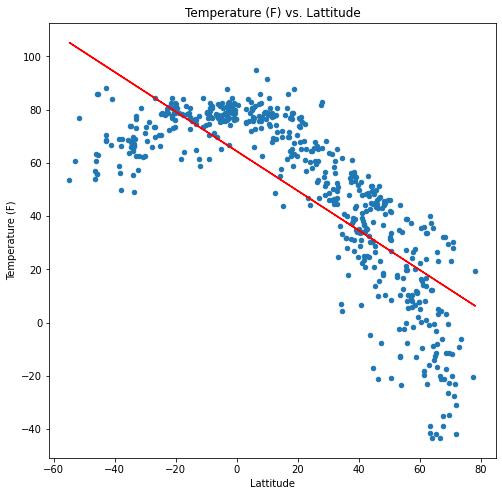

In [17]:
# Scatter plot for Temperature (F) vs. Latitude

#use pandas to plot a scatter plot
df.plot(kind="scatter", x="Lattitude", y="Temperature (F)", grid=False, figsize=(8,8),
              title="Temperature (F) vs. Lattitude")

#Calculate the correlation coefficient
lat = df.iloc[:, 2]
temp = df.iloc[:, 4]
correlation = st.pearsonr(lat, temp)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, temp)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/temp_lat.png")
plt.show()

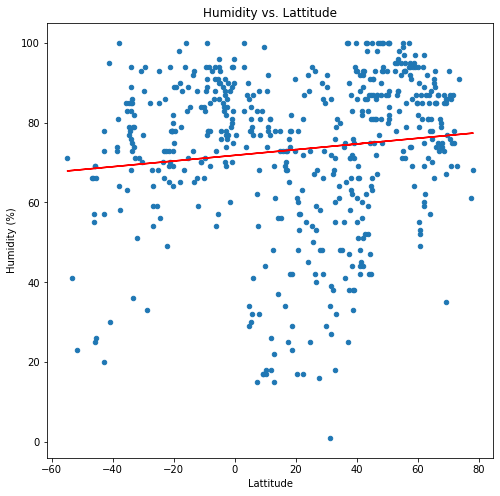

In [29]:
# Scatter plot Humidity (%) vs. Latitude
df.plot(kind="scatter", x="Lattitude", y="Humidity (%)", grid=False, figsize=(8,8),
              title="Humidity vs. Lattitude")

#Calculate the correlation coefficient
lat = df.iloc[:, 2]
hum = df.iloc[:, 6]
correlation = st.pearsonr(lat, hum)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, hum)
regress_values = lat * slope + intercept



plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/hum_lat.png")
plt.show()

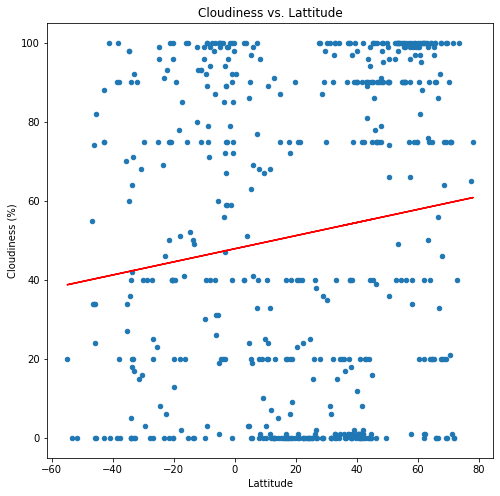

In [28]:
# Scatter plot Cloudiness (%) vs. Latitude
df.plot(kind="scatter", x="Lattitude", y="Cloudiness (%)", grid=False, figsize=(8,8),
              title="Cloudiness vs. Lattitude")

#Calculate the correlation coefficient
lat = df.iloc[:, 2]
cloud = df.iloc[:, 7]
correlation = st.pearsonr(lat, cloud)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, cloud)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/cld_lat.png")
plt.show()

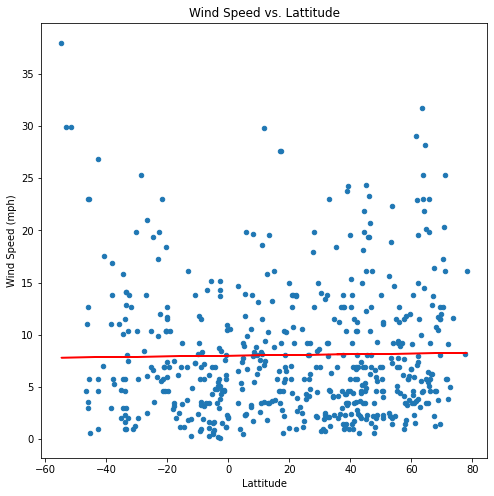

In [27]:
# Scatter plot Wind Speed (mph) vs. Latitude
df.plot(kind="scatter", x="Lattitude", y="Wind Speed (mph)", grid=False, figsize=(8,8),
              title="Wind Speed vs. Lattitude")

#Calculate the correlation coefficient
lat = df.iloc[:, 2]
wind = df.iloc[:, 8]
correlation = st.pearsonr(lat, wind)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, wind)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/wnd_lat.png")
plt.show()

In [9]:
#use loc to separate out rows where lat > 0
north_df = df.loc[(df['Lattitude'] > 0), :]

#use loc to separate out rows where lat < 0
south_df = df.loc[(df['Lattitude'] < 0), :]

In [10]:
north_df

,ID,City,Lattitude,Longitude,Temperature (F),Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,2112802,Hasaki,35.7333,140.8333,31.69,35.60,55,20,6.91,JP,1612475398
1,779622,Havøysund,70.9963,24.6622,30.20,30.20,86,75,16.11,NO,1612475399
6,546105,Nikolskoye,59.7035,30.7861,7.61,10.00,85,75,6.71,RU,1612475405
7,3374210,São Filipe,14.8961,-24.4956,72.07,72.07,78,87,8.86,CV,1612475408
8,5367788,Lompoc,34.6391,-120.4579,62.02,66.00,48,1,11.50,US,1612475409
...,...,...,...,...,...,...,...,...,...,...,...
534,2126785,Belaya Gora,68.5333,146.4167,-17.36,-17.36,87,64,10.45,RU,1612480664
537,3157090,Flekkefjord,58.2971,6.6607,19.99,19.99,69,34,11.77,NO,1612480667
538,1528998,Yumen,40.2833,97.2000,28.94,28.94,61,12,15.37,CN,1612480668
539,2121025,Srednekolymsk,67.4500,153.6833,-6.32,-6.32,81,92,16.42,RU,1612480670


In [11]:
south_df

,ID,City,Lattitude,Longitude,Temperature (F),Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
2,1282256,Hithadhoo,-0.6000,73.0833,82.29,82.29,75,85,10.49,MV,1612475243
3,4034551,Faanui,-16.4833,-151.7500,81.32,81.32,68,41,6.17,PF,1612475401
4,2137773,Vao,-22.6667,167.4833,78.73,78.73,86,46,19.82,NC,1612475403
5,160677,Chake Chake,-5.2459,39.7666,76.89,76.89,86,1,6.87,TZ,1612475404
9,934322,Mahébourg,-20.4081,57.7000,78.80,78.80,78,40,10.36,MU,1612475410
...,...,...,...,...,...,...,...,...,...,...,...
540,3662155,Sena Madureira,-9.0656,-68.6569,78.15,78.15,89,89,0.94,BR,1612480671
541,1650434,Bambanglipuro,-7.9500,110.2833,76.96,76.96,85,94,3.20,ID,1612480672
542,966380,Pampierstad,-27.7832,24.6877,65.79,65.79,85,0,8.46,ZA,1612480673
543,158514,Kaliua,-5.0606,31.7936,65.30,65.30,94,19,0.45,TZ,1612480674


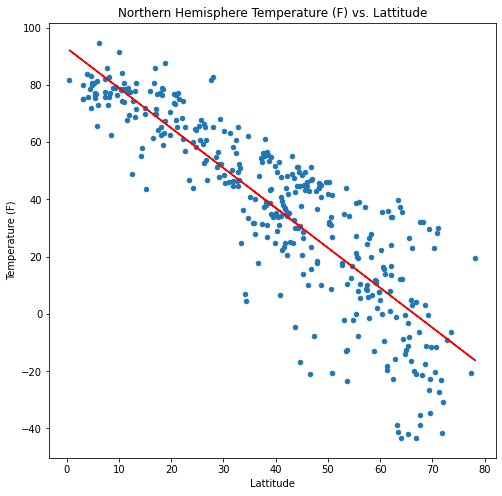

In [21]:
# Scatter plot for Northern Hemisphere Temperature (F) vs. Latitude

#use pandas to plot a scatter plot
north_df.plot(kind="scatter", x="Lattitude", y="Temperature (F)", grid=False, figsize=(8,8),
              title="Northern Hemisphere Temperature (F) vs. Lattitude")

#Calculate the correlation coefficient
lat = north_df.iloc[:, 2]
temp = north_df.iloc[:, 4]
correlation = st.pearsonr(lat, temp)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, temp)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/n_temp_lat.png")
plt.show()

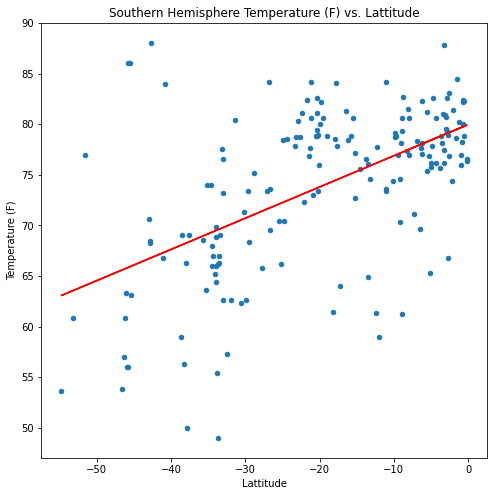

In [25]:
# Scatter plot for Southern Hemispher Temperature (F) vs. Latitude

#use pandas to plot a scatter plot
south_df.plot(kind="scatter", x="Lattitude", y="Temperature (F)", grid=False, figsize=(8,8),
              title="Southern Hemisphere Temperature (F) vs. Lattitude")

#Calculate the correlation coefficient
lat = south_df.iloc[:, 2]
temp = south_df.iloc[:, 4]
correlation = st.pearsonr(lat, temp)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, temp)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/s_temp_lat.png")
plt.show()

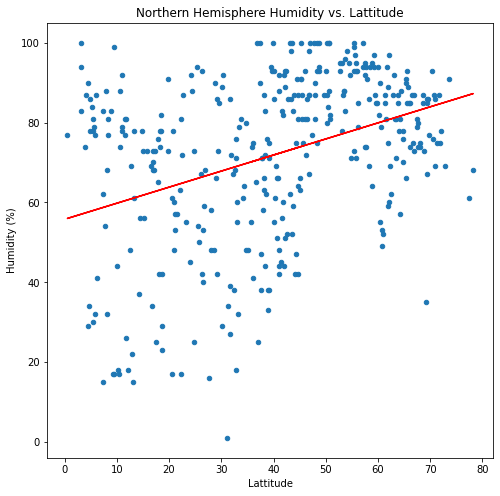

In [31]:
# Scatter plot Humidity (%) vs. Latitude
north_df.plot(kind="scatter", x="Lattitude", y="Humidity (%)", grid=False, figsize=(8,8),
              title="Northern Hemisphere Humidity vs. Lattitude")

#Calculate the correlation coefficient
lat = north_df.iloc[:, 2]
hum = north_df.iloc[:, 6]
correlation = st.pearsonr(lat, hum)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, hum)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/n_hum_lat.png")
plt.show()

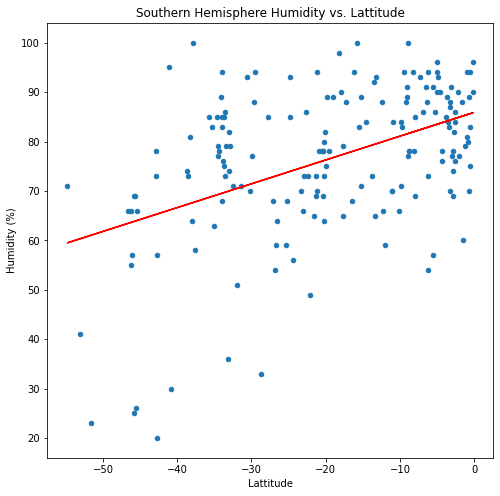

In [32]:
# Scatter plot Humidity (%) vs. Latitude
south_df.plot(kind="scatter", x="Lattitude", y="Humidity (%)", grid=False, figsize=(8,8),
              title="Southern Hemisphere Humidity vs. Lattitude")

#Calculate the correlation coefficient
lat = south_df.iloc[:, 2]
hum = south_df.iloc[:, 6]
correlation = st.pearsonr(lat, hum)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, hum)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/s_hum_lat.png")
plt.show()

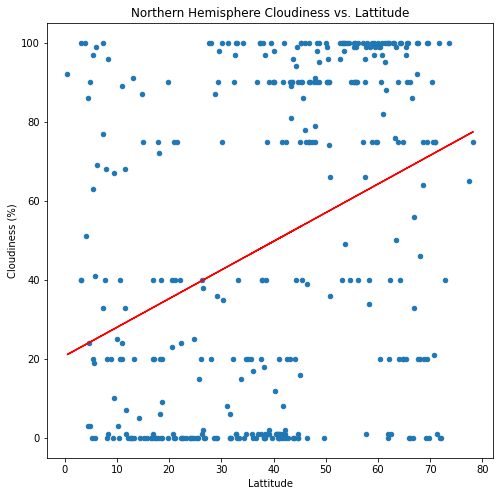

In [33]:
# Scatter plot Cloudiness (%) vs. Latitude
north_df.plot(kind="scatter", x="Lattitude", y="Cloudiness (%)", grid=False, figsize=(8,8),
              title="Northern Hemisphere Cloudiness vs. Lattitude")

#Calculate the correlation coefficient
lat = north_df.iloc[:, 2]
cloud = north_df.iloc[:, 7]
correlation = st.pearsonr(lat, cloud)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, cloud)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/n_cld_lat.png")
plt.show()

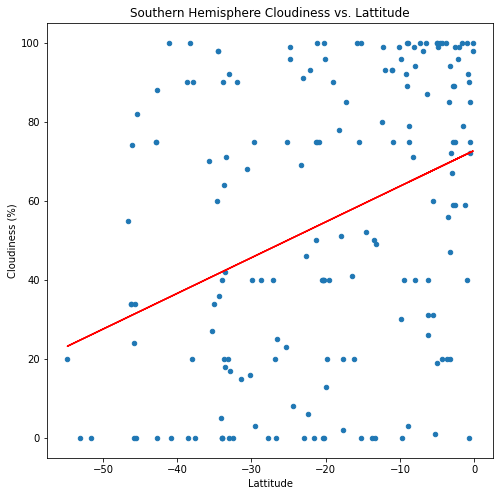

In [34]:
# Scatter plot Cloudiness (%) vs. Latitude
south_df.plot(kind="scatter", x="Lattitude", y="Cloudiness (%)", grid=False, figsize=(8,8),
              title="Southern Hemisphere Cloudiness vs. Lattitude")

#Calculate the correlation coefficient
lat = south_df.iloc[:, 2]
cloud = south_df.iloc[:, 7]
correlation = st.pearsonr(lat, cloud)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, cloud)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/s_cld_lat.png")
plt.show()

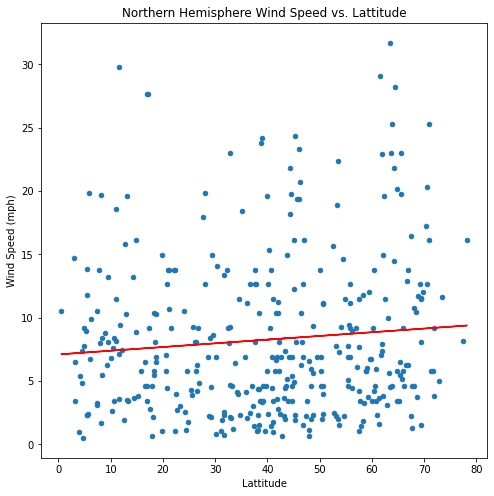

In [35]:
# Scatter plot Wind Speed (mph) vs. Latitude
north_df.plot(kind="scatter", x="Lattitude", y="Wind Speed (mph)", grid=False, figsize=(8,8),
              title="Northern Hemisphere Wind Speed vs. Lattitude")

#Calculate the correlation coefficient
lat = north_df.iloc[:, 2]
wind = north_df.iloc[:, 8]
correlation = st.pearsonr(lat, wind)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, wind)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/n_wnd_lat.png")
plt.show()

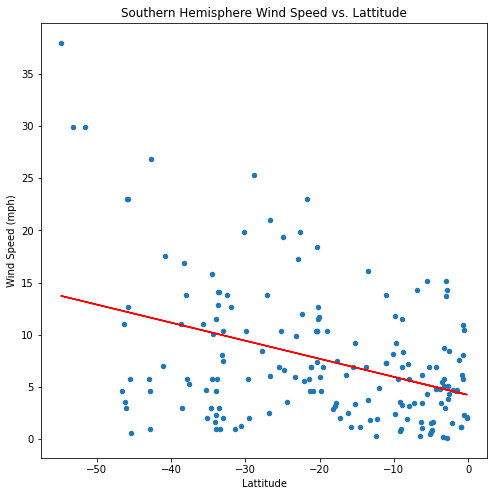

In [36]:
# Scatter plot Wind Speed (mph) vs. Latitude
south_df.plot(kind="scatter", x="Lattitude", y="Wind Speed (mph)", grid=False, figsize=(8,8),
              title="Southern Hemisphere Wind Speed vs. Lattitude")

#Calculate the correlation coefficient
lat = south_df.iloc[:, 2]
wind = south_df.iloc[:, 8]
correlation = st.pearsonr(lat, wind)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lat, wind)
regress_values = lat * slope + intercept

plt.plot(lat,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
plt.savefig("../Images/s_wnd_lat.png")
plt.show()